[7 2 1 ... 4 5 6]
(60000, 28, 28)
<class 'numpy.ndarray'>
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 - 2s - loss: 0.2241 - accuracy: 0.9350 - val_loss: 0.1025 - val_accuracy: 0.9688
Epoch 2/5
469/469 - 1s - loss: 0.0804 - accuracy: 0.9748 - val_loss: 0.0782 - val_accurac

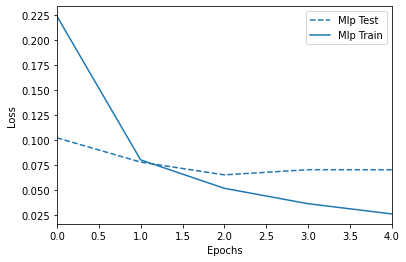

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

'''
지시사항 1번
   MNIST 데이테 셋을 전처리하는 'preprocess' 함수를 완성합니다.

   Step01. MNIST 데이터 이미지를 0~1 사이 값으로 정규화해줍니다.
           원본은 0~255 사이의 값입니다.
           
   Step02. 0~9 사이 값인 label을 클래스화 하기 위해 
           원-핫 인코딩을 진행합니다.

'''

def preprocess():
    
    # MNIST 데이터 세트를 불러옵니다.
    mnist = tf.keras.datasets.mnist
    
    # MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()  
    print(test_labels)
    
    train_images = train_images / 255.
    test_images = test_images / 255.
    
    train_labels = to_categorical(train_labels, 10)
    test_labels = to_categorical(test_labels, 10)
    
    return train_images, test_images, train_labels, test_labels


'''
지시사항 2번
   다층 퍼셉트론(MLP) 모델을 생성합니다.

'''
def MLP():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=512,activation='relu'))
    model.add(tf.keras.layers.Dense(units=256,activation='relu'))
    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
	
    return model


'''
지시사항 3번
   모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. MLP 함수를 통해 모델을 불러옵니다.
   
   Step02. 모델의 손실 함수, 최적화 알고리즘, 평가 방법을 설정합니다.
   
   Step03. 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 모델을 학습시킵니다. 검증용 데이터도 설정하세요.
           'epochs'와 'batch_size'도 자유롭게 설정하세요.
              
   Step05. 모델을 테스트하고 손실(loss)값과 
           Test Accuracy 값 및 예측 클래스, 
           손실 함수값 그래프를 출력합니다. 
           
           모델의 성능을 확인해보고,
           목표값을 달성해보세요.
'''

def main():

    # 데이터를 불러옵니다.
    train_images, test_images, train_labels, test_labels = preprocess()
    
    print(train_images.shape)
    print(type(train_images))
	
    
    # 지시사항 2에서 설정한 모델을 불러옵니다.
    model = MLP()
    
    # 모델의 구조를 확인합니다.
    model.summary()
    
    # 컴파일러를 설정합니다.
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    # fit 함수를 사용하여 모델을 학습합니다.
    # 학습 수행 시 정보는 history에 저장합니다.
    history = model.fit(train_images, train_labels, epochs=5, batch_size=128,validation_data=(test_images, test_labels),verbose=2)
    
    # evaluate 함수를 사용하여 테스트 데이터의 결과값을 저장합니다.
    loss, test_acc = model.evaluate(test_images,test_labels)
    
    print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
    print('예측한 Test Data 클래스 : ',model.predict_classes(test_images))
    
    Visulaize([('MLP', history)], 'loss')
    
    return test_acc


if __name__ == "__main__":
    main()